## L1-based models for Sparse Signals
This present **three L1-based reg. models**( Lasso, ARD, Elas..) on a synthetic signal. Signal is obtained from **sparse and cor. features** that are corrupted with noise.(signal rebuild)

## Generate synthetic dataset
dataset: n_samples < n_features,  So it is a undertermined system. It have infinite solution, so we can't apply an Ordinary Least Squares, Regularization will introduce a penelty term to limit coefficients.

1. make sparse matrix

In [5]:
import numpy as np
rng = np.random.RandomState(42)
n_samples,n_features, n_informative = 50,100,10
time_step=np.linspace(-2,2,n_samples)
freqs = 2*np.pi*np.sort(rng.rand(n_features))/0.01
X=np.zeros((n_samples, n_features))

for i in range(n_features):
    X[:, i]=np.sin(freqs[i]*time_step)

# 
idx = np.arange(n_features)
true_coef = (-1)**idx*np.exp(-idx/10) # Á¨¶Âè∑‰∫§ÊõøÁöÑÔºåÁ≥ªÊï∞ÈÄêÊ∏êÂèòÂ∞è
true_coef[n_informative:] =0 # sparsify coef
y=np.dot(X,true_coef)
print(true_coef)


[ 1.         -0.90483742  0.81873075 -0.74081822  0.67032005 -0.60653066
  0.54881164 -0.4965853   0.44932896 -0.40656966  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0. 

Text(0.5, 1.0, '5-features sin bo')

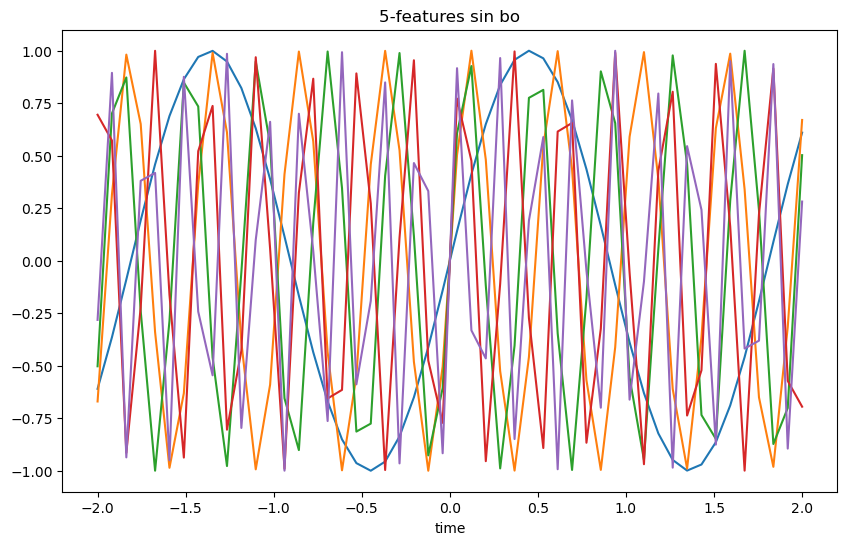

In [6]:
import matplotlib.pyplot as plt
# ÂèØËßÜÂåñÂâçÂá†‰∏™ÁâπÂæÅ
plt.figure(figsize=(10, 6))
for i in range(5):  # Âè™ÁªòÂà∂Ââç5‰∏™ÁâπÂæÅ
    plt.plot(time_step, X[:, i], label=f'Feature {i+1}, Freq={freqs[i]:.2f}')
plt.xlabel('time')
plt.title('5-features sin bo')

2. introduce some random and gaus. noise. to features and target

In [7]:
for i in range(n_features):
    X[:, i] = np.sin(freqs[i] * time_step + 2*(rng.random_sample() - 0.5))
    X[:, i]+= 0.2*rng.normal(0,1,n_samples)
y +=  0.2*rng.normal(0,1,n_samples)

50Ë°å50Ê†∑Êú¨ÂØπÂ∫î50‰∏™Êó∂Èó¥ÁÇπÔºåX‰∏ÄÂàóÂç≥‰∏∫50‰∏™Êó∂Èó¥‰∏ãÁöÑ‰∏ÄÁâπÂæÅÊ≠£Âº¶Ê≥¢ÂÄºÔºåy‰∏∫‰ø°Âè∑

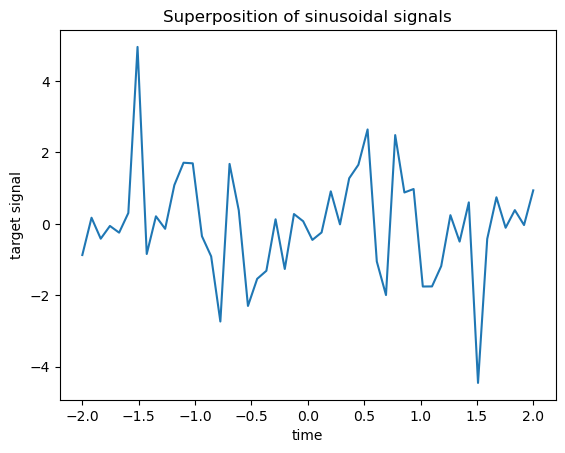

In [8]:
import matplotlib.pyplot as plt
plt.plot(time_step,y)
plt.ylabel("target signal")
plt.xlabel("time")
_ = plt.title("Superposition of sinusoidal signals")

We split the data into train and test sets for simplicity. In practice one should use a <u>TimeSeriesSplit</u> cross-validation to estimate the variance of the test score.   
Here we set shuffle="False" as we **must not use** training data that succeed the testing data when dealing with data that have a **temporal relationship**.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.5, shuffle=False)

In [10]:
print(X_train.shape)
print(y_train.shape)

(25, 100)
(25,)


In the following, we compute the performance of three l1-based models in terms of the goodness of fit $R^2$score and the fitting time.   
Then we make a plot to compare the sparsity of the estimated coefficients with respect to the ground-truth coefficients and finally we analyze the previous results.

# LASSO

In [11]:
from time import time
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
t0 = time()
lasso = Lasso(alpha=0.14).fit(X_train, y_train)
print(f"Lasso fit done in {time() - t0:.3f}s")

y_pred_lasso=lasso.predict(X_test)
r2_score_lasso = r2_score(y_test,y_pred_lasso)
print(f"Lasso R^2 score on test data : {r2_score_lasso:.3f}")

Lasso fit done in 0.002s
Lasso R^2 score on test data : 0.489


# ElasticNet
ElasticNet is a middle ground between Lasso and Ridge, 

In [14]:
from sklearn.linear_model import ElasticNet
t0 = time()
enet = ElasticNet(alpha=0.08, l1_ratio=0.5).fit(X_train, y_train)
print(f"ElasticNet fit done in {(time() - t0):.3f}s")

y_pred_enet = enet.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(f"ElasticNet r^2 on test data : {r2_score_enet:.3f}")

ElasticNet fit done in 0.002s
ElasticNet r^2 on test data : 0.512


# Plot and analysis of the results

In [17]:
print(X_train.shape, true_coef.shape,y_train.shape)

(25, 100) (100,) (25,)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(
    {
        'True coefficients': true_coef,
        'Lasso':lasso.coef_,
        'ElasticNet':enet.coef_,
    }
)

In [21]:
df.head()

True coefficients     Lasso  ElasticNet
0           1.000000  0.027951    0.095145
1          -0.904837 -0.135309   -0.331096
2           0.818731  0.000000    0.000000
3          -0.740818 -0.000000   -0.210996
4           0.670320  0.000000   -0.000000

Text(0.5, 1.0, "Models' coefficients\nLasso $R^2$:0.489;ElasticNet $R^2$:0.512")

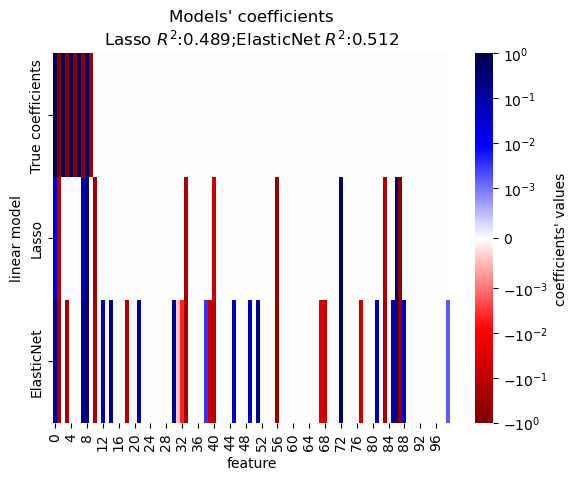

In [33]:
from matplotlib.colors import SymLogNorm
ax = sns.heatmap(
    df.T,
    # Â¢ûÂº∫ÂèØËßÜÂåñÊïàÊûúÔºå Â§ßÂ∞èÂÄºÂå∫ÂàÜÊõ¥Âä†ÊòéÊòæ
    norm=SymLogNorm(linthresh=10e-4, vmin=-1, vmax=1), 
    cbar_kws={"label": "coefficients' values"},
    cmap="seismic_r",
)
plt.xlabel('feature')
plt.ylabel("linear model")
plt.title(
    f"Models' coefficients\n"
    f"Lasso $R^2$:{r2_score_lasso:.3f};"
    f"ElasticNet $R^2$:{r2_score_enet:.3f}"
)


üìä ÂØπ‰∫éÈ´òÂ∫¶Áõ∏ÂÖ≥ÁöÑÁâπÂæÅÊï∞ÊçÆ„ÄÇ
- ElasticNet Áõ∏ÊØîLasso ÔºåÁ®ÄÁñèÁöÑÊõ¥Â∞ëÔºåÊõ¥Âä†L2. ÊïàÊûúÊõ¥Â•Ω